# 4.2 木と最適化

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

### 最小全域木
prim法

In [1]:
def prim(G):
    V = [v for v in G.nodes()]
    n = len(V)
    T = []
    S = [V[0]]
    while len(S) < n:
        candidates = [(u,v,w['weight']) for u in S
                         for v,w in G[u].items() if not(v in S)]
        (u, v, w) = min(candidates, key=lambda x:x[2])
        S += [v]
        T += [(u,v)]
    return T

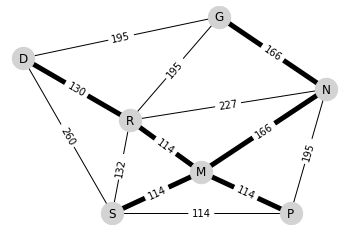

In [13]:
weighted_elist = [('D','G',195), ('D','R',130), ('D','S',260),
                  ('G','R',195), ('G','N',166), ('R','S',132),
                  ('R','M',114), ('R','N',227), ('M','S',114),
                  ('M','P',114), ('M','N',166), ('N','P',195),
                  ('P','S',114)]
p = {'D':(0,15), 'G':(11,19), 'N':(17,12), 'R':(6,9), 'M':(10,4),
     'P':(15,0), 'S':(5,0)}
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)

elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

mst = prim(G)
nx.draw_networkx(G, pos=p, node_color='lightgray',
                 node_size=500, width=1)
nx.draw_networkx_edges(G, pos=p, edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis('off')
plt.show()

### 深さ優先探索 (depth first search, DFS)
LIFO (last in first out)

In [14]:
import collections
S = collections.deque()
S.append('a'); S.append('b')
print(S.pop())
S.append('c'); S.append('d'); S.append('e')
print(S.pop())
print(S)

b
e
deque(['a', 'c', 'd'])


In [15]:
def dfs(G):
    V = [v for v in G.nodes()]
    start = V[0]
    S = collections.deque([start])
    flagged = {v:False for v in G.nodes()}
    T = []
    while len(S) != 0:
        t = S[-1] # stackの1番上の値を参照
        flagged[t] = True
        edges = [(u,v) for (u,v) in G.edges(t)
                 if not (flagged[v])]
        if edges != []:
            (u,v) = edges[0]
            S.append(v)
            T.append((u,v))
        else:
            S.pop()
    return T

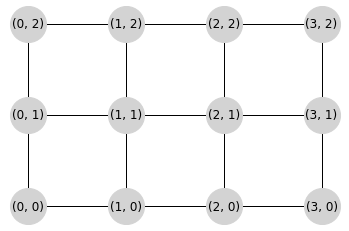

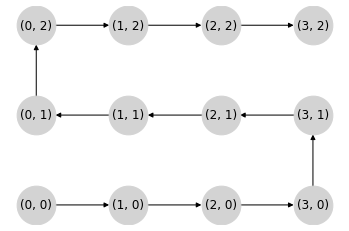

In [17]:
# グラフの初期化、元のグラフの描画
G = nx.grid_2d_graph(4, 3)
p = {v:v for v in G.nodes()}
nx.draw_networkx(G, pos=p, node_color='lightgray', node_size=1300,
                 with_labels=True)
plt.axis('off')
plt.show()

# 深さ優先探索の実行
dfst = dfs(G)
DG = nx.DiGraph()
DG.add_edges_from(dfst)
nx.draw_networkx(DG, edgelist=dfst, pos=p, node_color='lightgray',
                 node_size=1500, with_labels=True)
plt.axis('off')
plt.show()

### 幅優先探索 (breadth first search)
FIFO (first in first out)

In [19]:
Q = collections.deque()
Q.append('a'); Q.append('b')
print(Q.popleft())
Q.append('c'); Q.append('d'); Q.append('e')
print(Q.popleft()); print(Q)

a
b
deque(['c', 'd', 'e'])


In [20]:
import heapq

h = []
heapq.heappush(h, 3); heapq.heappush(h, 5)
heapq.heappush(h, 1); heapq.heappush(h, 4)
heapq.heappush(h, 2);
print(h)
heapq.heappop(h)
print(h)

[1, 2, 3, 5, 4]
[2, 4, 3, 5]
